In [ ]:
"""
회귀분석 : regression 또는 regression analysis

변수들 사이에서 나타나는 경향성을 설명하는 것을 목적으로 함
주어진 값의 경향/추세를 설명하는 대표 함수를 찾고, 
미지의 값을 예측하기 위해 대표 함수를 사용함
"""

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
# CSV 파일로부터 데이터 불러오기 : Lect05/DataSet/LinRegData.csv
table = pd.read_csv('DataSet/LinRegData.csv')

In [ ]:
"""
데이터 파일(DataSet/LinRegData.csv)에 저장된 값:

x_val,y_val
3.52,2.48
2.58,2.27
3.31,2.47
4.07,2.77
4.62,2.98
3.98,3.05
4.29,3.18
4.83,3.46
3.71,3.03
4.61,3.25
3.90,2.67
3.20,2.53
"""

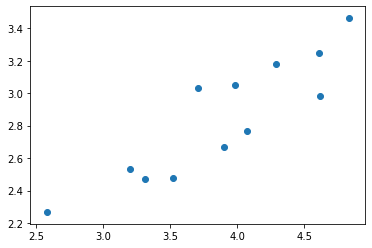

In [3]:
# 불러온 값을 그래프로 나타내기
x, y = table['x_val'], table['y_val']
plt.scatter(x, y)
plt.show()

In [4]:
# 주어진 값의 경향/추세를 설명하기 위한 선형 함수 찾기

# 선형 회귀(linear regression) 객체 만들기
regr = linear_model.LinearRegression()

# predict 함수 동작을 위한 변환 함수 (정해진 형태로 변환해 주어야 함)
def transformMulti(x):
    return np.array(x).reshape((-1,1))

# 주어진 값의 경향을 최대한 정확하게 설명/대표하는 선형 함수 찾기
regr.fit(transformMulti(x), y)

LinearRegression()

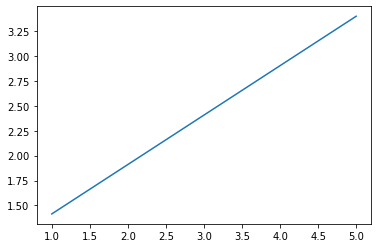

In [25]:
# 경향을 대표하는 모델 함수를 사용해서, 일정 범위의 x 값에 대한 y 값 예측하기
xs = np.linspace(1, 5, 100)  # 1~5를 100개로 나눈 것에 해당하는 x값 만들어내기
guess = regr.predict(transformMulti(xs))  # 데이터 변환(reshape)이 필요함

plt.plot(xs, guess)
plt.show()

In [26]:
# 경향을 대표하는 모델 함수를 사용해서, 임의의 x 값에 대한 y 값 예측하기

# predict 함수 동작을 위한 변환 함수 (정해진 형태로 변환해 주어야 함)
def transformSingle(x):
    return np.array(x).reshape((1,-1))


guess = regr.predict(transformSingle(2))  # 데이터 변환(reshape)이 필요함
print('입력이 2일 때, 예측값은 ', guess, '입니다.')

guess = regr.predict(transformSingle(3))  # 데이터 변환(reshape)이 필요함
print('입력이 3일 때, 예측값은 ', guess, '입니다.')

guess = regr.predict(transformSingle(4))  # 데이터 변환(reshape)이 필요함
print('입력이 4일 때, 예측값은 ', guess, '입니다.')

guess = regr.predict(transformSingle(5))  # 데이터 변환(reshape)이 필요함
print('입력이 5일 때, 예측값은 ', guess, '입니다.')

입력이 2일 때, 예측값은  [1.9107879] 입니다.
입력이 3일 때, 예측값은  [2.40639114] 입니다.
입력이 4일 때, 예측값은  [2.90199437] 입니다.
입력이 5일 때, 예측값은  [3.39759761] 입니다.


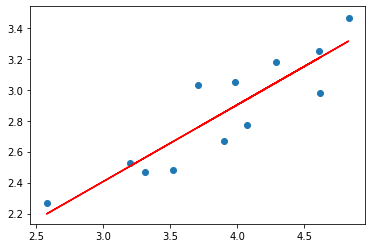

In [29]:
# 원래의 데이터와, 데이터 경향을 대표하는 함수를 동시에 그리기

# 모델을 사용해서 원래의 x 값을 입력으로, 각각에 해당하는 예측값 구하기
y_pred = regr.predict(transformMulti(x))

plt.scatter(x, y)  # 원래의 데이터를 그리기
plt.plot(x, y_pred, 'r')  # 모델을 사용해서 예측한 값 그리기
plt.show()  # 최종 그래프를 화면에 출력하기

In [ ]:
"""
실제 데이터를 가지고 실습하기
캐글(Kaggle) : https://www.kaggle.com/quantbruce/real-estate-price-prediction
파일명 : real_estate.csv
저장된 값 : 부동산 가격
저장된 열(column) : 번호, 주택 거래 일자, 주택 연식, 가까운 지하철 역까지 거리, 
                   근처 편의점 수, 위도, 경도, 단위 면적 당 주택 가격
"""

In [30]:
# 데이터 불러오기
data = pd.read_csv('DataSet/real_estate.csv')
print(data.describe())

# 데이터 중에서, {번호, 위도, 경도}는 주택 가격에 영향을 주지 않을 것으로 생각됨...

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [40]:
# 데이터를 추출하여, 간단한 이름의 변수에 저장하기
price = data['Y house price of unit area']
x2 = data['X2 house age']
x3 = data['X3 distance to the nearest MRT station']
x4 = data['X4 number of convenience stores']

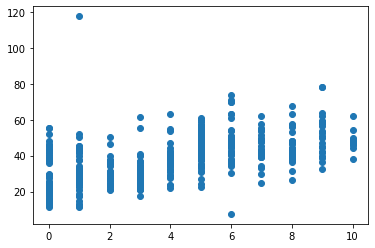

In [41]:
# 근처 편의점 수(x4)에 따른 주택 가격 변화
plt.scatter(x4,price)
plt.show()

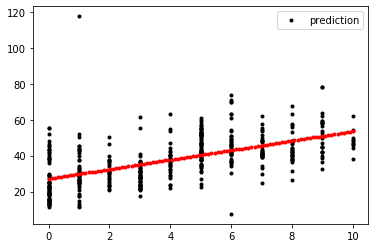

In [54]:
"""
근처 편의점 수(x4)에 따른 주택 가격 변화 추세를 대표하는 함수 모델 찾기
"""

# 선형 회귀(linear regression) 객체 만들기
modelx4 = linear_model.LinearRegression()

# 주어진 값의 경향을 최대한 정확하게 설명/대표하는 선형 함수 찾기
modelx4.fit(transformMulti(x4), price)

x4min = np.array(x4).min()  # x4의 값 중에서 최솟값 얻기
x4max = np.array(x4).max()  # x4의 값 중에서 최대값 얻기
x4s = np.linspace(x4min, x4max, 100)  # 구간을 100개로 나눈 것에 해당하는 x값 만들어내기
price_pred = modelx4.predict(transformMulti(x4s))  # 데이터 변환(reshape)이 필요함

plt.plot(x4, price, 'k.', x4s, price_pred, 'r.')
plt.legend(['prediction'])
plt.show()

In [55]:
guess = modelx4.predict(transformSingle(2))  # 데이터 변환(reshape)이 필요함
print('입력이 2일 때, 예측값은 ', guess, '입니다.')

guess = modelx4.predict(transformSingle(4))  # 데이터 변환(reshape)이 필요함
print('입력이 4일 때, 예측값은 ', guess, '입니다.')

guess = modelx4.predict(transformSingle(6))  # 데이터 변환(reshape)이 필요함
print('입력이 6일 때, 예측값은 ', guess, '입니다.')

guess = modelx4.predict(transformSingle(8))  # 데이터 변환(reshape)이 필요함
print('입력이 8일 때, 예측값은 ', guess, '입니다.')

입력이 2일 때, 예측값은  [32.45641171] 입니다.
입력이 4일 때, 예측값은  [37.73171864] 입니다.
입력이 6일 때, 예측값은  [43.00702556] 입니다.
입력이 8일 때, 예측값은  [48.28233249] 입니다.


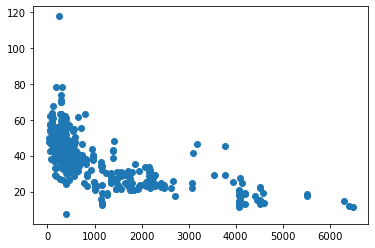

In [48]:
# 근처 지하철 역 까지의 거리(x3)에 따른 주택 가격 변화
plt.scatter(x3,price)
plt.show()

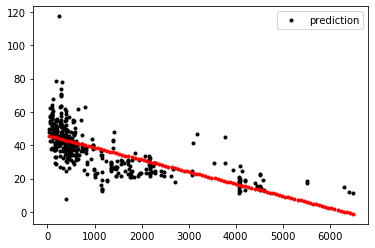

In [53]:
"""
근처 지하철 역 까지의 거리(x3)에 따른 주택 가격 변화 추세를 대표하는 함수 모델 찾기
"""

# 선형 회귀(linear regression) 객체 만들기
modelx3 = linear_model.LinearRegression()

# 주어진 값의 경향을 최대한 정확하게 설명/대표하는 선형 함수 찾기
modelx3.fit(transformMulti(x3), price)

x3min = np.array(x3).min()  # x3의 값 중에서 최솟값 얻기
x3max = np.array(x3).max()  # x3의 값 중에서 최대값 얻기
x3s = np.linspace(x3min, x3max, 100)  # 구간을 100개로 나눈 것에 해당하는 x값 만들어내기
price_pred = modelx3.predict(transformMulti(x3s))  # 데이터 변환(reshape)이 필요함

plt.plot(x3, price, 'k.', x3s, price_pred, 'r.')
plt.legend(['prediction'])
plt.show()

coef2 : [ 1.82199511e-06 -1.55340427e-02  4.97815418e+01]

poly2 :
           2
1.822e-06 x - 0.01553 x + 49.78


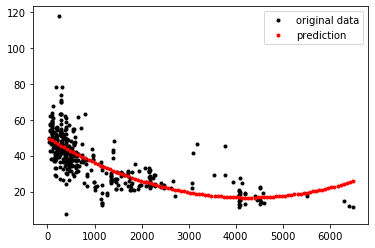

In [65]:
# 좀 더 정확한 모델 함수를 구하기 위해, 선형(1차)이 아닌 2차 다항 함수 사용하기
"""
np.polyfit
x3을 x 값으로, price를 y 값으로 하고, 2차 다항식으로 fitting 하기
리턴값은 fitting된 다항식의 계수(coefficient)값
"""
coef2 = np.polyfit(x3, price, 2)
print('coef2 :', coef2)  # 최고차항의 계수부터 시작해서 차례로 출력
print('')

poly2 = np.poly1d(coef2)  # 계수를 사용해서 함수의 형태로 만들어 주는 연산
print('poly2 :')
print(poly2)

_ = plt.plot(x3, price, 'k.', x3s, poly2(x3s), 'r.')
plt.legend(['original data', 'prediction'])
plt.show()

z3 : [-6.13231314e-10  6.76502118e-06 -2.50863801e-02  5.27344851e+01]

p3 :
            3             2
-6.132e-10 x + 6.765e-06 x - 0.02509 x + 52.73


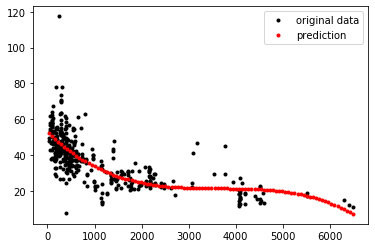

In [63]:
# 좀 더 정확한 모델 함수를 구하기 위해, 선형(1차)이 아닌 3차 다항 함수 사용하기
coef3 = np.polyfit(x3, price, 3)
print('coef3 :', coef3)  # 최고차항의 계수부터 시작해서 차례로 출력
print('')

poly3 = np.poly1d(coef3)
print('poly3 :')
print(poly3)

_ = plt.plot(x3, price, 'k.', x3s, poly3(x3s), 'r.')
plt.legend(['original data', 'prediction'])
plt.show()

In [58]:
print('입력이 0일 때, 예측값은 ', poly3(0), '입니다.')
print('입력이 2000일 때, 예측값은 ', poly3(2000), '입니다.')
print('입력이 4000일 때, 예측값은 ', poly3(4000), '입니다.')
print('입력이 6000일 때, 예측값은 ', poly3(6000), '입니다.')

입력이 0일 때, 예측값은  52.73448509477045 입니다.
입력이 2000일 때, 예측값은  24.71595910251583 입니다.
입력이 4000일 때, 예측값은  21.382499464224182 입니다.
입력이 6000일 때, 예측값은  13.299003114740131 입니다.
